Tutorial
========

In [2]:
import distillation.amundson_1958 as am

In [3]:
model = am.Model(
    components = ['n-Butane', 'n-Pentane', 'n-Octane'], # name of components
    F = 1000.,  # feed flow rate [kmol/h]
    P = 101325*2., # pressure [Pa]
    z_feed = [0.2, 0.5, 0.3],  # feed mole fractions
    RR=1., # reflux ratio (L/D)
    D=400., # distillate rate (L/D)
    N=30, # number of equilibrium stages (does not include total condenser)
    feed_stage=15 # Feed equilibrium stage
)

In [4]:
model.add_parameters(verbose=True)

Setting DePriester parameters for n-Butane:
             a_T1 [deg Rankine^2]: -1280557.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.94986
             a_p1 [dimensionless]: -0.96455
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  2.661186999988651
Setting DePriester parameters for n-Pentane:
             a_T1 [deg Rankine^2]: -1524891.0
             a_T2 [deg Rankine]: 0.0
             a_T6 [dimensionless]: 7.33129
             a_p1 [dimensionless]: -0.89143
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.7541583496653457
Setting DePriester parameters for n-Octane:
             a_T1 [deg Rankine^2]: 0.0
             a_T2 [deg Rankine]: -7646.81641
             a_T6 [dimensionless]: 12.48457
             a_p1 [dimensionless]: -0.73152
             a_p2 [psia^2]: 0.0
             a_p3 [psia]: 0.0
     K value at 300 K, 1 bar=  0.026447701262845617
Setting heat capac

In [5]:
model.calculate_T_feed()

In [6]:
model.initialize_flow_rates()

In [7]:
model.update_K_values()

In [8]:
for i in model.components:
    model.solve_component_mass_bal(i)
    print(i, model.l[i])

n-Butane [1.99929848e+02 7.50794119e+01 5.16369459e+01 4.72352856e+01
 4.64088106e+01 4.62536280e+01 4.62244902e+01 4.62190192e+01
 4.62179919e+01 4.62177990e+01 4.62177628e+01 4.62177560e+01
 4.62177547e+01 4.62177545e+01 4.62177544e+01 1.61762141e+02
 1.06259992e+02 6.97853466e+01 4.58151085e+01 3.00624585e+01
 1.97102050e+01 1.29069591e+01 8.43603340e+00 5.49785120e+00
 3.56695024e+00 2.29800970e+00 1.46409323e+00 9.16063875e-01
 5.55912482e-01 3.19229859e-01 7.01519441e-02]
n-Pentane [162.02993244 179.02554496 188.41470147 193.60170253 196.46724002
 198.05029446 198.92484641 199.40798905 199.67489922 199.82235265
 199.9038127  199.94881496 199.97367628 199.98741082 199.9949984
 699.99716547 700.00135562 700.00945752 700.02512306 700.05541332
 700.11398137 700.22722625 700.44619209 700.86957583 701.68821398
 703.2711005  706.33170761 712.24957713 723.69213684 745.81702018
 337.97006756]
n-Octane [3.72340821e-14 7.50452401e-13 7.93790500e-12 8.03694080e-11
 8.10297370e-10 8.16614128e

In [9]:
print(model.T)
model.update_T_values()
print(model.T)

[326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258 326.41148258 326.41148258 326.41148258 326.41148258
 326.41148258]
[302.65135841 312.93486066 316.91145887 317.91720146 318.18940775
 318.28431529 318.32619847 318.34732468 318.35860855 318.36477637
 318.36827234 318.37124777 318.38344257 318.49636357 319.61426411
 329.62417689 333.54344333 336.58271797 338.82738692 340.4260849
 341.5352658  342.2903401  342.79656106 343.13014108 343.34285081
 343.46640767 343.51477991 343.48345873 343.35410574 343.43030105
 354.27450115]


In [10]:
print(model.T_is_converged())

False


In [11]:
iter = 0
while not model.T_is_converged():
    model.update_K_values()
    for i in model.components:
        model.solve_component_mass_bal(i)
    model.update_T_values()
    print(iter, model.T)
    iter += 1

0 [303.82010228 314.8243077  319.41767894 320.95803126 321.5028456
 321.73405341 321.85215209 321.92046213 321.96273148 321.98982045
 322.00753943 322.01948275 322.03063923 322.08413538 322.76095892
 330.05347799 333.53942976 335.57269784 336.59985012 337.07509156
 337.29364756 337.41379468 337.51324063 337.62998113 337.78516419
 337.9947774  338.2757233  338.65155432 339.201758   340.92411227
 355.64166628]
1 [304.2134622  315.15024544 319.52139164 320.81642697 321.14076802
 321.19358667 321.17595046 321.14440564 321.11460285 321.09027878
 321.07163136 321.05824816 321.05433934 321.12157291 321.98994048
 330.3055674  334.32449975 336.95785975 338.50142308 339.33688746
 339.75264352 339.9284065  339.96720904 339.9267985  339.84110691
 339.73371044 339.6267557  339.55126984 339.61822    341.05732592
 356.15904863]
2 [304.4945106  315.42460432 319.73332596 321.01083038 321.35681505
 321.45112468 321.48141105 321.49645053 321.50801966 321.51843099
 321.52784638 321.53643585 321.54854746 3

In [12]:
model.solve_energy_balances()

In [13]:
print(model.flow_rates_converged())

False


In [14]:
outer_iter = -1
inner_iter = -1
while not model.flow_rates_converged():
    outer_iter += 1
    for i in model.components:
        model.solve_component_mass_bal(i)
    model.update_T_values()
    while not model.T_is_converged():
        inner_iter += 1
        model.update_K_values()
        for i in model.components:
            model.solve_component_mass_bal(i)
        model.update_T_values()
    print(outer_iter, inner_iter)
    model.solve_energy_balances()

0 4
1 9
2 13
3 16
4 18
5 19
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20


In [15]:
print(model.L)
print(model.V)

[ 400.          357.42139397  379.77377068  391.06361155  396.59622522
  399.32301602  400.67713386  401.35300679  401.69127037  401.86051956
  401.9439698   401.97357479  401.84550015  400.05825967  381.77734625
 1402.76914663 1424.58918773 1440.30711388 1449.76978102 1454.90512741
 1457.54264456 1458.86151162 1459.51482064 1459.84029603 1460.00690127
 1460.09550396 1460.11585752 1459.72120044 1454.68874228 1406.58698668
  600.        ]
[  0.         714.80523296 757.42139397 779.77377068 791.06361155
 796.59622522 799.32301602 800.67713386 801.35300679 801.69127037
 801.86051956 801.9439698  801.97357479 801.84550015 800.05825967
 781.77734625 802.76914663 824.58918773 840.30711388 849.76978102
 854.90512741 857.54264456 858.86151162 859.51482064 859.84029603
 860.00690127 860.09550396 860.11585752 859.72120044 854.68874228
 806.58698668]


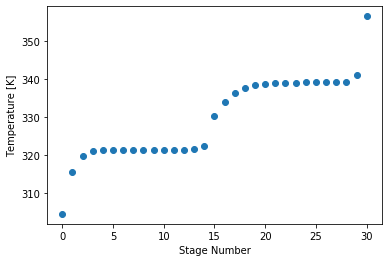

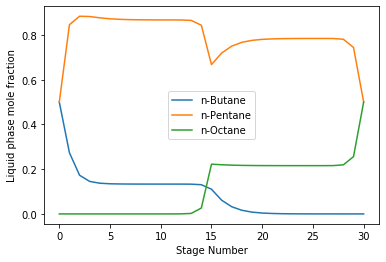

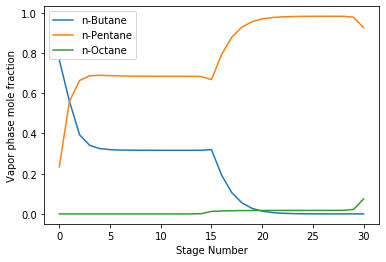

In [16]:
# plot temperatures
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(model.stages, model.T, 'o')
ax.set_xlabel('Stage Number')
ax.set_ylabel('Temperature [K]')

# plot liquid-phase mole fractions
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
# calculate mole fractions
for i in model.components:
    x = model.l[i][:]/model.L[:]
    y = model.K[i]*x
    ax2.plot(model.stages, x, label=i)
ax2.set_ylabel('Liquid phase mole fraction')
ax2.set_xlabel('Stage Number')
ax2.legend()


fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111)
# calculate mole fractions
for i in model.components:
    x = model.l[i][:]/model.L[:]
    y = model.K[i]*x
    ax3.plot(model.stages, y, label=i)
ax3.set_ylabel('Vapor phase mole fraction')
ax3.set_xlabel('Stage Number')
ax3.legend()